Imports


In [4]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
from statsmodels.stats import proportion


In [5]:
df1 = pd.read_csv("../Datasets/dataset1.csv")
df2 = pd.read_csv("../Datasets/dataset2.csv")


In [7]:
print(df1.head())



         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  30/12/2017 

In [8]:

print(df1.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
None


In [9]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB
None


In [11]:
print(df2.head())

               time  month  hours_after_sunset  bat_landing_number  \
0  26/12/2017 16:13      0                -0.5                  20   
1  26/12/2017 16:43      0                 0.0                  28   
2  26/12/2017 17:13      0                 0.5                  25   
3  26/12/2017 17:43      0                 1.0                  71   
4  26/12/2017 18:13      0                 1.5                  44   

   food_availability  rat_minutes  rat_arrival_number  
0           4.000000          0.0                   0  
1           4.000000          0.0                   0  
2           4.000000          0.0                   0  
3           4.000000          0.0                   0  
4           3.753857          0.0                   0  


In [12]:
risk_counts = df1['risk'].value_counts()
print(risk_counts)

risk
0    458
1    449
Name: count, dtype: int64


In [13]:
avoidance_rate = (df1['risk'] == 0).mean()
print("Avoidance rate:", avoidance_rate)

Avoidance rate: 0.5049614112458655


In [14]:
reward_rate = (df1['reward'] == 1).mean()
print("Reward rate:", reward_rate)

Reward rate: 0.5336273428886439


In [15]:
print("Mean landing-to-food time:", df1['bat_landing_to_food'].mean())
print("Median landing-to-food time:", statistics.median(df1['bat_landing_to_food']))

Mean landing-to-food time: 11.713133940775084
Median landing-to-food time: 4.0


In [16]:
print("Mean rat arrivals:", df2['rat_arrival_number'].mean())

Mean rat arrivals: 0.44465379180405085


In [17]:
corr = df2['rat_minutes'].corr(df2['bat_landing_number'])
print("Correlation between rat_minutes and bat_landing_number:", corr)

Correlation between rat_minutes and bat_landing_number: -0.14622750084478836


In [18]:
count_risk = (df1['risk'] == 1).sum()
n = len(df1)
ci_low, ci_high = proportion.proportion_confint(count_risk, n, alpha=0.05, method='normal')
print("Proportion risk-taking 95% CI:", ci_low, ci_high)

Proportion risk-taking 95% CI: 0.46250042279398046 0.5275767547142886


In [19]:
t_stat, p_val = stats.ttest_1samp(df1['bat_landing_to_food'], 0)
print("T-test for hesitation:", t_stat, p_val)

T-test for hesitation: 12.760551147028764 2.0529332992152506e-34


In [20]:
delay_risk = df1[df1['risk'] == 1]['bat_landing_to_food']
delay_avoid = df1[df1['risk'] == 0]['bat_landing_to_food']

t_stat, p_val = stats.ttest_ind(delay_risk, delay_avoid, equal_var=False)
print("T-test delay (risk vs avoid):", t_stat, p_val)

T-test delay (risk vs avoid): 5.0964658799597675 4.3836454381476383e-07


In [21]:
corr, p_val = stats.pearsonr(df2['rat_minutes'], df2['bat_landing_number'])
print("Pearson correlation:", corr, "p-value:", p_val)

Pearson correlation: -0.14622750084478847 p-value: 1.2875253590004781e-11


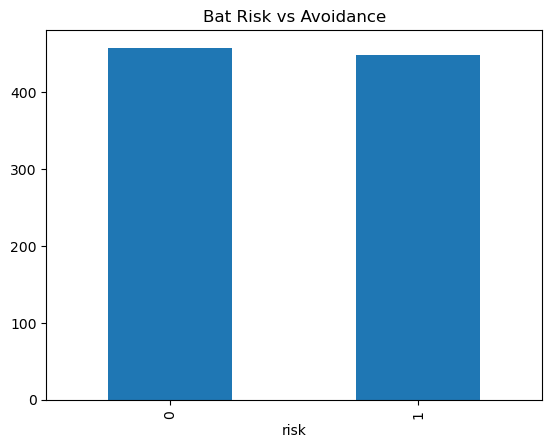

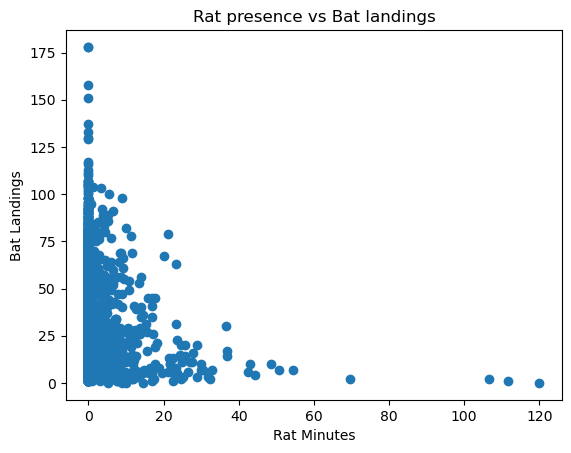

In [22]:
import matplotlib.pyplot as plt

# Risk vs Avoidance
df1['risk'].value_counts().plot(kind='bar', title="Bat Risk vs Avoidance")
plt.show()

# Rat minutes vs Bat landings
plt.scatter(df2['rat_minutes'], df2['bat_landing_number'])
plt.xlabel("Rat Minutes")
plt.ylabel("Bat Landings")
plt.title("Rat presence vs Bat landings")
plt.show()